In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math
import pickle
import seaborn as sns

from graspy.plot import heatmap

from simulations import rho_sbm_marg, rho_sbm_diff_block
from utils import sbm_params

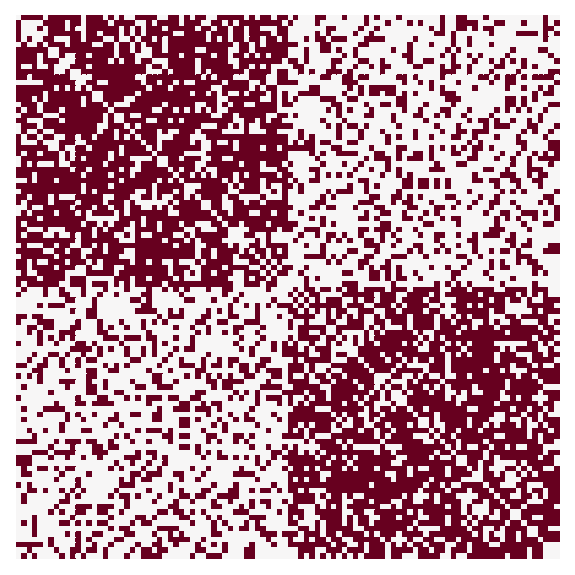

In [7]:
A, B = rho_sbm_marg(rho=0.1, k=2, AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../figures/sbm_diff_marg1.png')

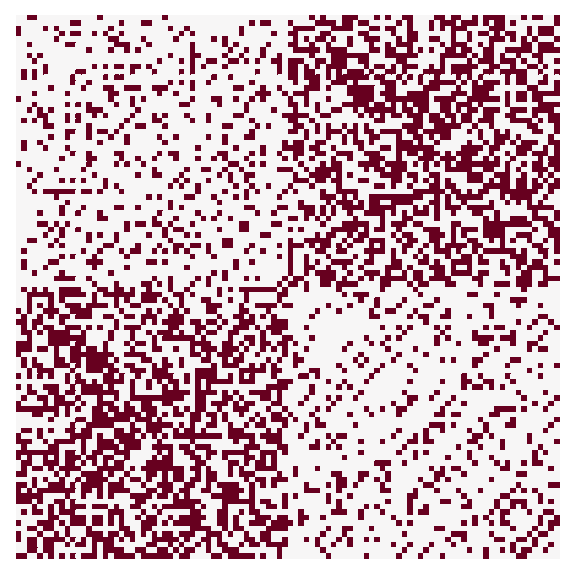

In [8]:
heatmap(B, cbar=False)
plt.savefig('../figures/sbm_diff_marg2.png')

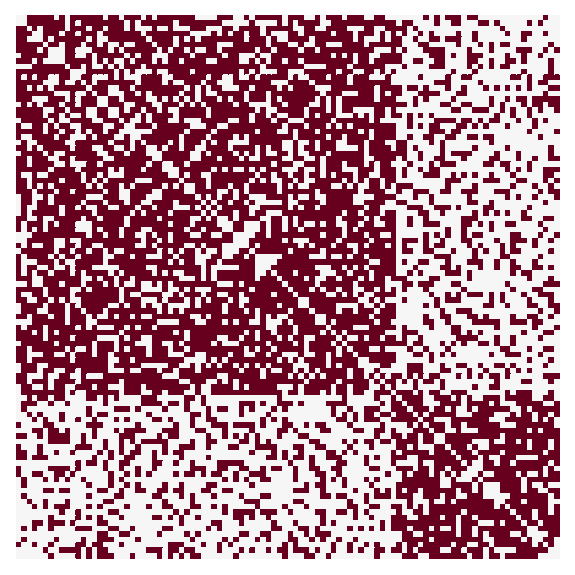

In [9]:
A, B = rho_sbm_diff_block(rho=0.1, k=[70, 30], AL=sbm_params(a=0.7, b=0.3), BL=sbm_params(a=0.2, b=0.5), n=100)
heatmap(A, cbar=False)
plt.savefig('../figures/sbm_diff_block1.png')

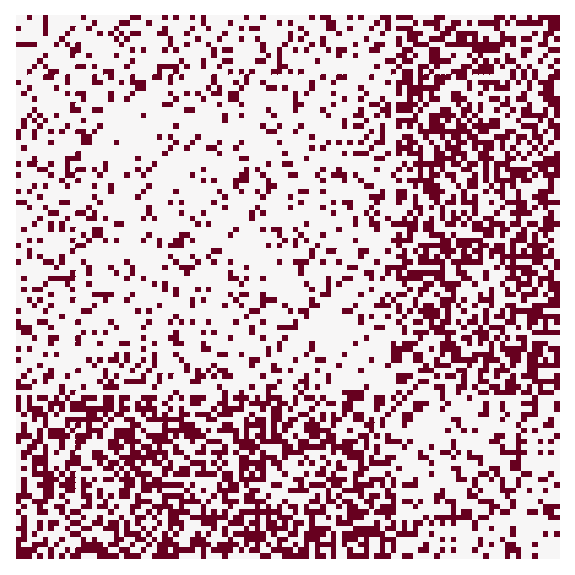

In [10]:
heatmap(B, cbar=False)
plt.savefig('../figures/sbm_diff_block2.png')

In [27]:
n_arr = np.linspace(10, 100, 10, dtype=int)
#mpl.style.use('seaborn')

plt.figure(figsize=(8, 6))
colors = {
    'mgc': [0.6350, 0.0780, 0.1840],
    'dcorr': (0, 0.4470, 0.7410), 
    'pearson': 'orange',
    'dcorr (K)': 'green'
}

plt.rcParams['xtick.labelsize']=20
plt.rcParams['ytick.labelsize']=20
plt.rcParams["legend.fancybox"] = True
legend_size = 28
label_size = 28

linestyle = '-'
marker = 'o'

<Figure size 576x432 with 0 Axes>

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

Text(0.5, 1.0, 'Power on Correlated Bernoulli Graphs')

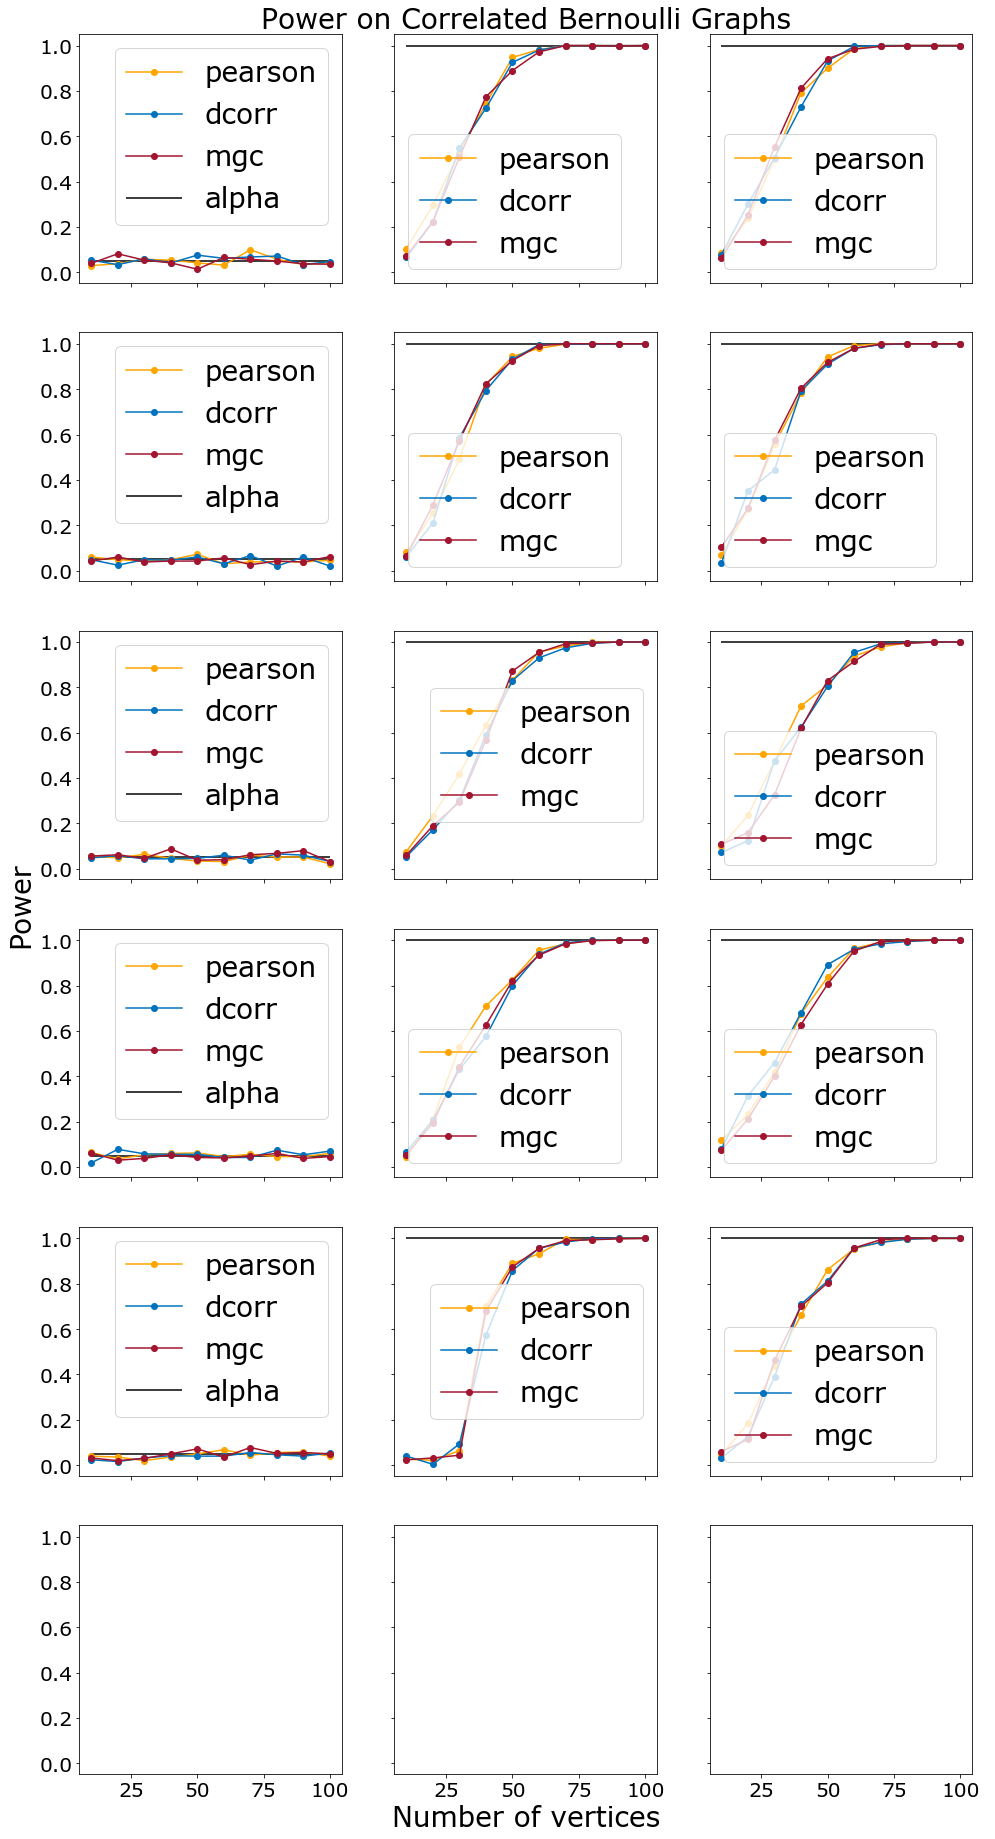

In [28]:
fig, axs = plt.subplots(6, 3, figsize=(16, 32), squeeze=True, sharex=True, sharey=True)
settings = ['er', 'er_marg', 'sbm', 'sbm_marg', 'sbm_marg_est_block']#, 'sbm_diff_block']
for i, setting in enumerate(settings):
    with open ('../../results/rho_{}_power_twosided.pkl'.format(setting), 'rb') as f:
        power_results = pickle.load(f)
    for j in range(3):
        for name, test_power in power_results.items():
            axs[i, j].plot(n_arr, test_power[j, :], color=colors[name], linestyle=linestyle, 
                    marker=marker, label='{}'.format(name))
        if j == 0:
            axs[i, j].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
        else:
            axs[i, j].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
        axs[i, j].legend(prop={'size': legend_size})
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Number of vertices", fontsize=label_size)
plt.ylabel("Power", fontsize=label_size)
plt.title('Power on Correlated Bernoulli Graphs', fontsize=label_size)

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

Text(0, 0.5, 'Test statistic')

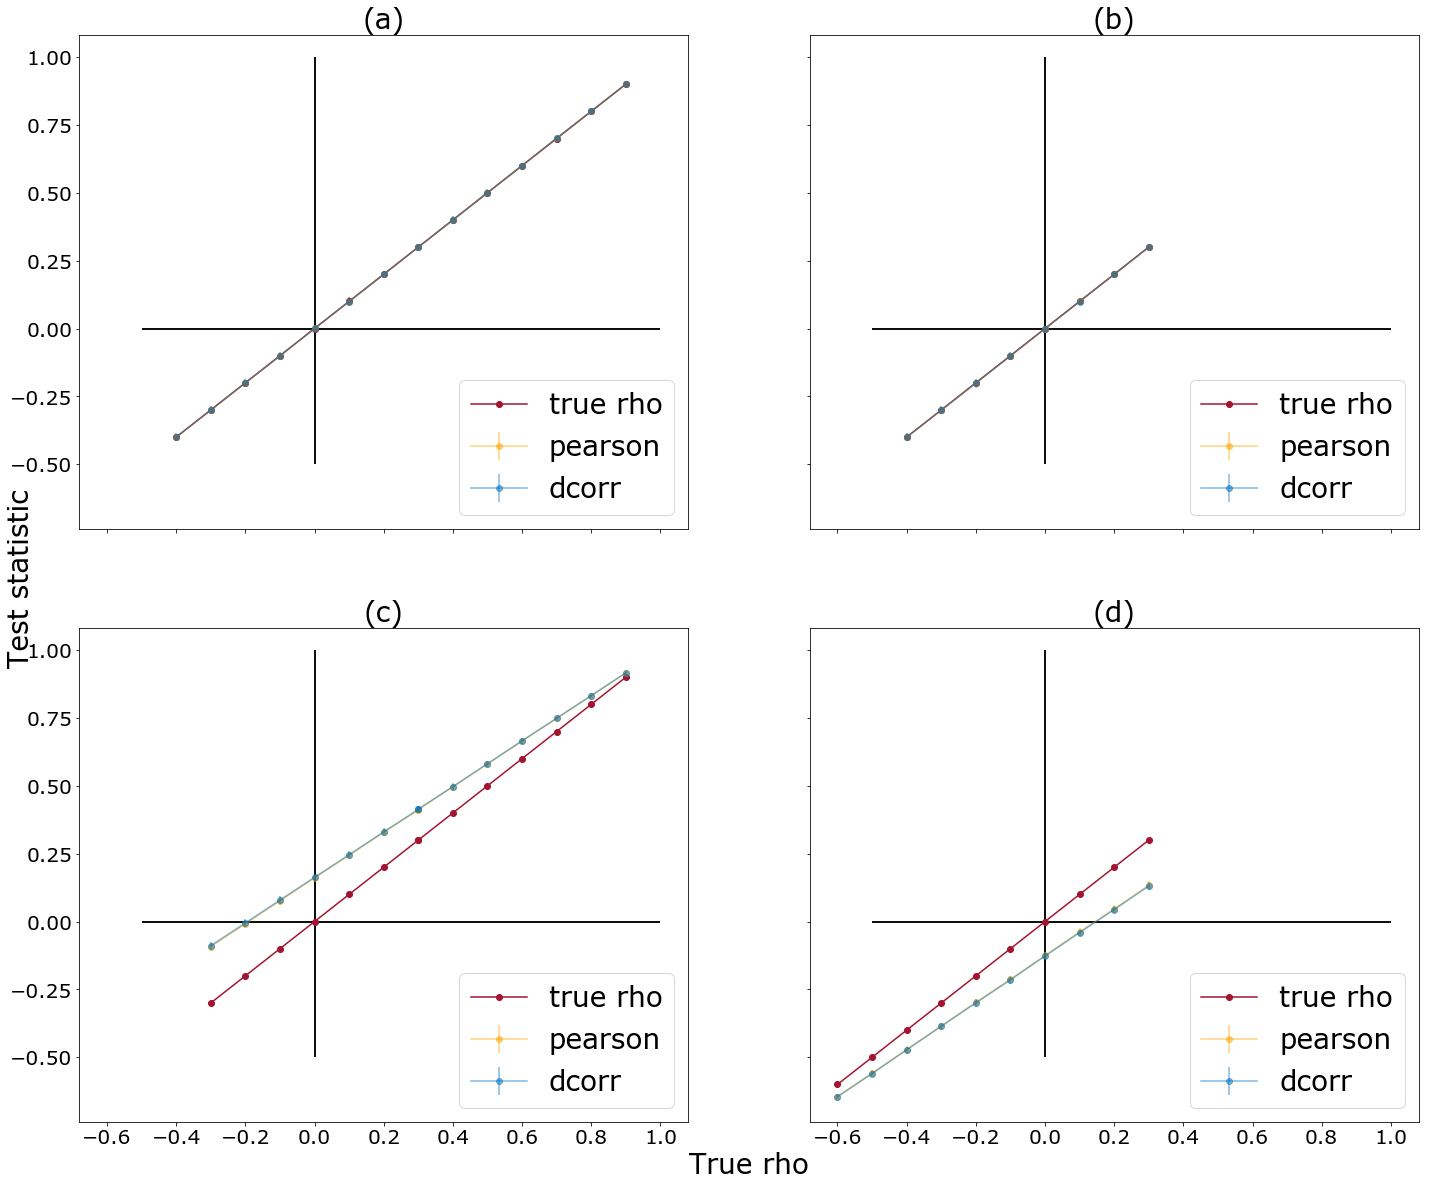

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(24, 20), squeeze=True, sharex=True, sharey=True)
axs = axs.reshape(-1)
test_names = ['pearson', 'dcorr']
xmin = -0.5
xmax = 1
ymin = -0.5
ymax = 1
alpha = 0.5
colors = {
    'true': [0.6350, 0.0780, 0.1840],
    'dcorr': (0, 0.4470, 0.7410), 
    'pearson': 'orange',
}

with open('../../results/rho_er_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.4, 0.9, 14), 1)
axs[0].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[0].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    axs[0].hlines(y=0, xmin=xmin, xmax=xmax)
    axs[0].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[0].legend(loc=4, prop={'size': legend_size})
    axs[0].set_title('(a)', fontsize=label_size)

    
with open('../../results/rho_er_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.4, 0.3, 8), 1)
axs[1].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[1].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    axs[1].hlines(y=0, xmin=xmin, xmax=xmax)
    axs[1].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[1].legend(loc=4, prop={'size': legend_size})
    axs[1].set_title('(b)', fontsize=label_size)

    
with open('../../results/rho_sbm_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.3, 0.9, 14), 1)
axs[2].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[2].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    axs[2].hlines(y=0, xmin=xmin, xmax=xmax)
    axs[2].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[2].legend(loc=4, prop={'size': legend_size})
    axs[2].set_title('(c)', fontsize=label_size)

with open('../../results/rho_sbm_marg_teststats.pkl', 'rb') as f:
    ts = pickle.load(f)
rho_arr = np.around(np.linspace(-0.6, 0.3, 10), 1)
axs[3].plot(rho_arr, rho_arr, label='true rho', marker='o', linestyle=linestyle, color=colors['true'])
for name in test_names:
    axs[3].errorbar(rho_arr, np.mean(ts[name], axis=1), yerr=np.std(ts[name], axis=1),
             marker='o', linestyle=linestyle, label='{}'.format(name), alpha=alpha, color=colors[name])
    axs[3].hlines(y=0, xmin=xmin, xmax=xmax)
    axs[3].vlines(x=0, ymin=ymin, ymax=ymax)
    axs[3].legend(loc=4, prop={'size': legend_size})
    axs[3].set_title('(d)', fontsize=label_size)

    
# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("True rho", fontsize=label_size)
plt.ylabel("Test statistic", fontsize=label_size)

#plt.savefig('../../figures/all_teststats.png', bbox_inches='tight')

/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/Users/jxiong/Documents/Projects/graph_independence_test/env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing on

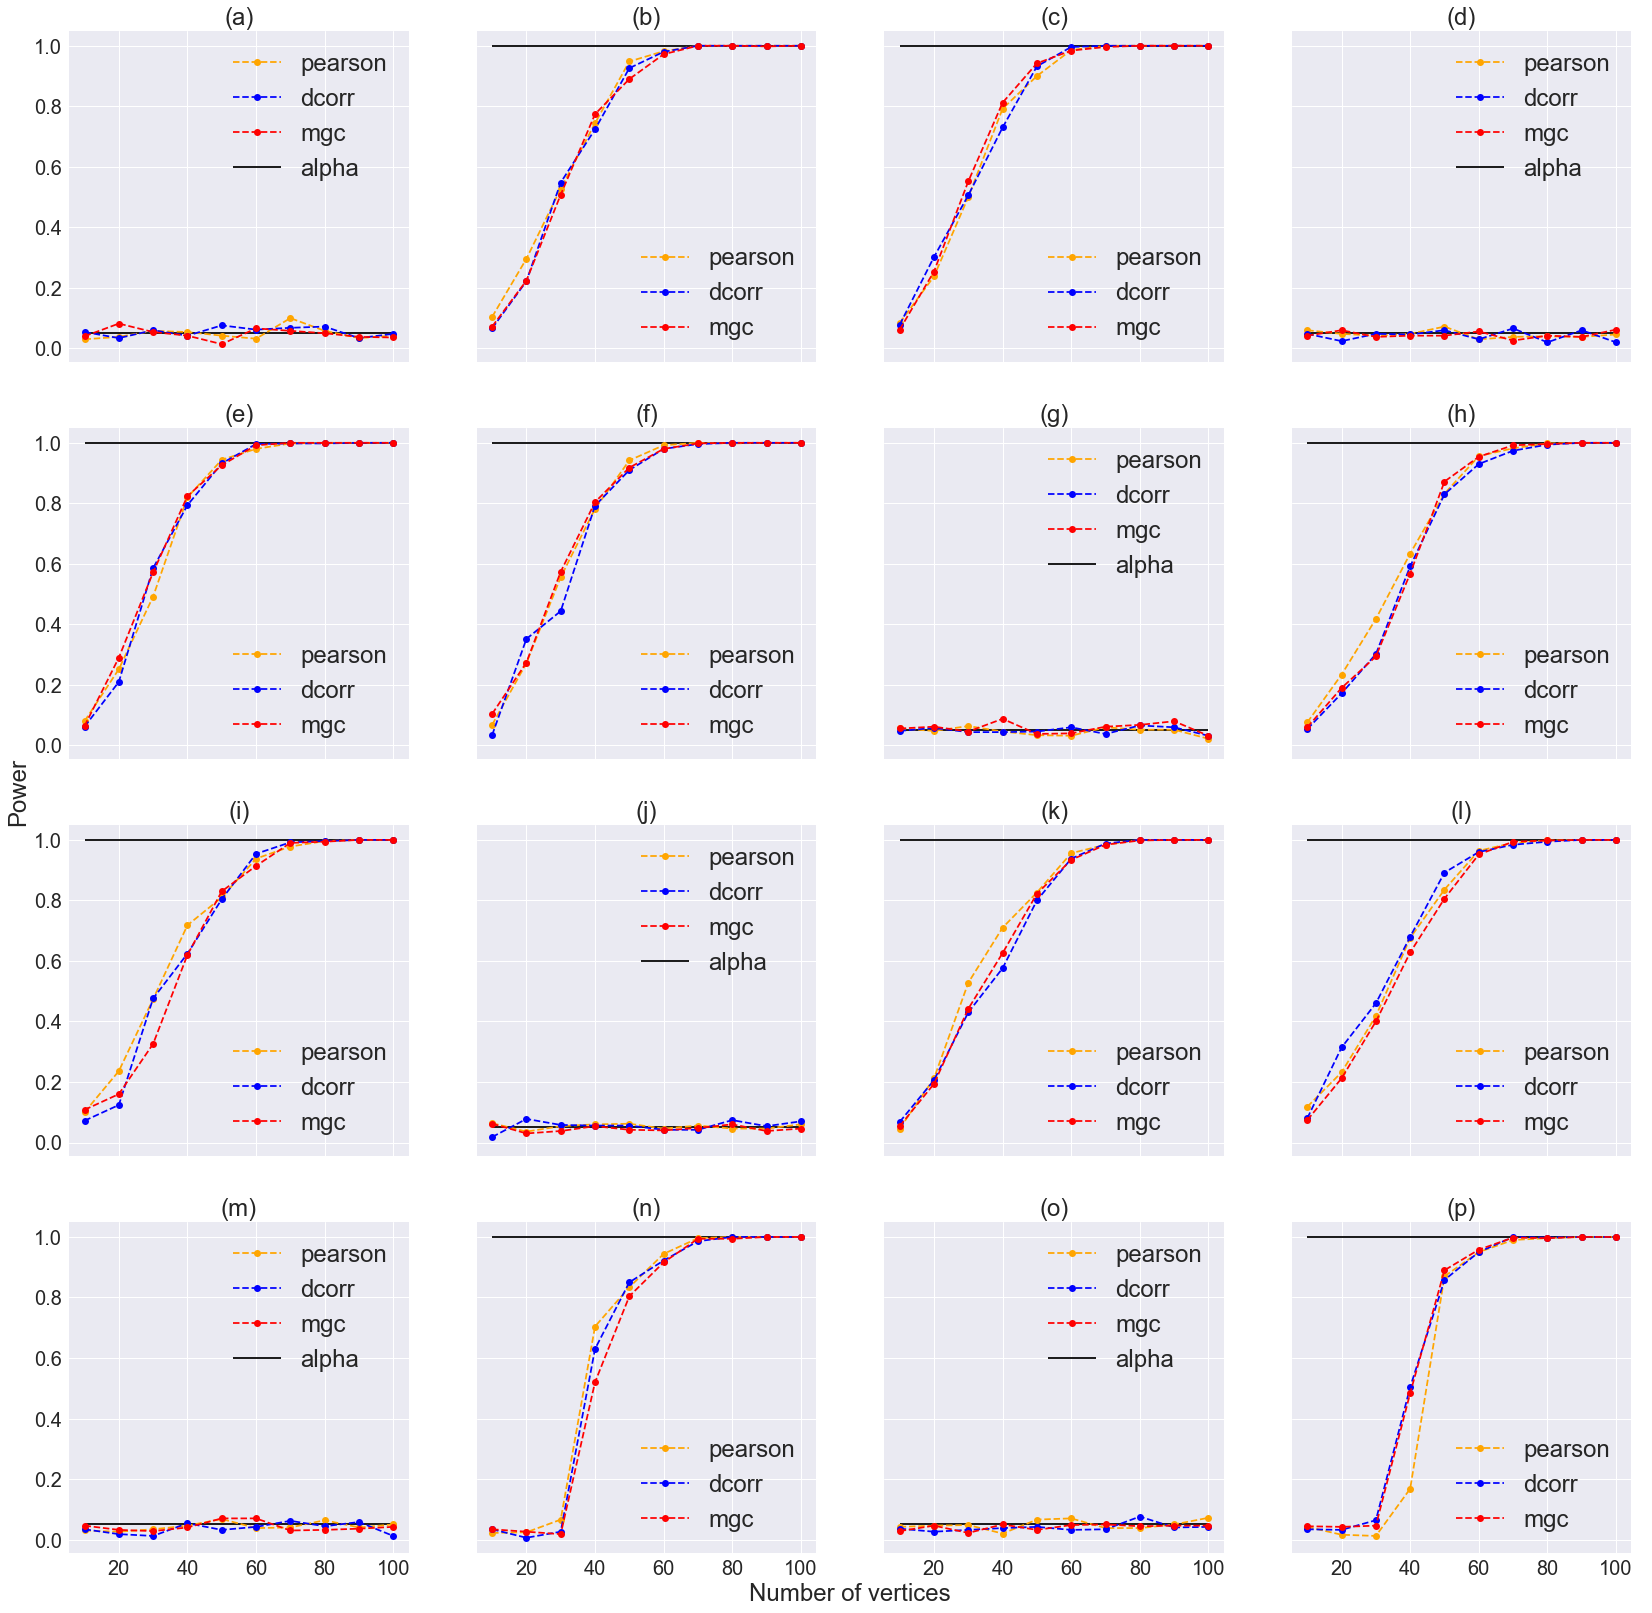

In [24]:
fig, axs = plt.subplots(4, 4, figsize=(28, 28), squeeze=True, sharex=True, sharey=True)
axs = axs.reshape(-1)
with open ('../../results/rho_er_power_twosided.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[0].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[1].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[2].plot(n_arr, test_power[2, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))

axs[0].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[0].legend(prop={'size': legend_size})
axs[0].set_title('(a)', fontsize=label_size)
axs[1].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[1].legend(loc=4, prop={'size': legend_size})
axs[1].set_title('(b)', fontsize=label_size)
axs[2].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[2].legend(prop={'size': legend_size})
axs[2].set_title('(c)', fontsize=label_size)


with open ('../../results/rho_er_marg_power_twosided.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[3].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[4].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[5].plot(n_arr, test_power[2, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
axs[3].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[3].legend(prop={'size': legend_size})
axs[3].set_title('(d)', fontsize=label_size)
axs[4].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[4].legend(loc=4, prop={'size': legend_size})
axs[4].set_title('(e)', fontsize=label_size)
axs[5].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[5].legend(prop={'size': legend_size})
axs[5].set_title('(f)', fontsize=label_size)


with open ('../../results/rho_sbm_power_twosided.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[6].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[7].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[8].plot(n_arr, test_power[2, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
axs[6].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[6].legend(prop={'size': legend_size})
axs[6].set_title('(g)', fontsize=label_size)
axs[7].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[7].legend(loc=4, prop={'size': legend_size})
axs[7].set_title('(h)', fontsize=label_size)
axs[8].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[8].legend(prop={'size': legend_size})
axs[8].set_title('(i)', fontsize=label_size)

with open ('../../results/rho_sbm_marg_power_twosided.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[9].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[10].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
    axs[11].plot(n_arr, test_power[2, :], color=colors[name], linestyle=linestyle, 
                marker=marker, label='{}'.format(name))
axs[9].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[9].legend(prop={'size': legend_size})
axs[9].set_title('(j)', fontsize=label_size)
axs[10].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[10].legend(loc=4, prop={'size': legend_size})
axs[10].set_title('(k)', fontsize=label_size)
axs[11].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[11].legend(prop={'size': legend_size})
axs[11].set_title('(l)', fontsize=label_size)


with open('../../results/rho_sbm_marg_est_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[12].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))
    axs[13].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
             marker=marker, label='{}'.format(name))
axs[12].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[12].legend(prop={'size': legend_size})
axs[12].set_title('(m)', fontsize=label_size)
axs[13].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[13].legend(prop={'size': legend_size})
axs[13].set_title('(n)', fontsize=label_size)


with open('../../results/rho_sbm_diff_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)
for name, test_power in power_results.items():
    axs[14].plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))
    axs[15].plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
             marker=marker, label='{}'.format(name))
axs[14].hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
axs[14].legend(prop={'size': legend_size})
axs[14].set_title('(o)', fontsize=label_size)
axs[15].hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
axs[15].legend(prop={'size': legend_size})
axs[15].set_title('(p)', fontsize=label_size)

# add a big axes, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axes
plt.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
plt.grid(False)
plt.xlabel("Number of vertices", fontsize=label_size)
plt.ylabel("Power", fontsize=label_size)

plt.savefig('../../figures/all_power.png', bbox_inches='tight')

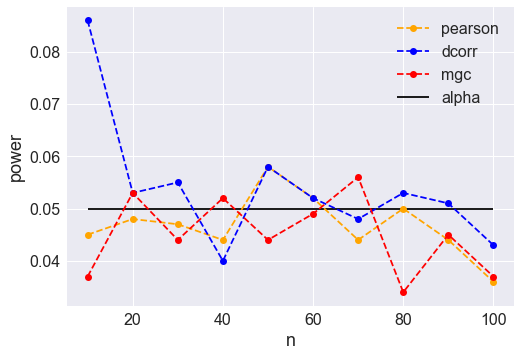

In [4]:
with open ('../../results/rho_er_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/er_power_null.png', bbox_inches='tight')

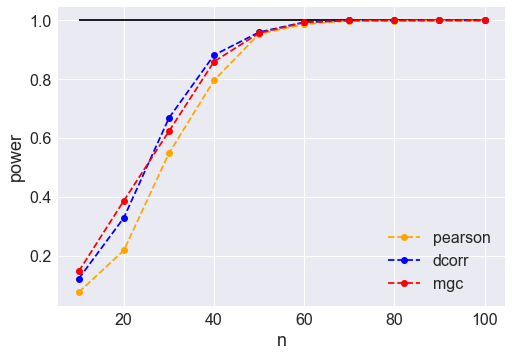

In [6]:
with open ('../../results/rho_er_power_alt.pkl', 'rb') as f:
    power_results = pickle.load(f)

rho = 0.1
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/er_power_alt.png'.format(rho), bbox_inches='tight')

In [7]:
with open ('../../results/rho_er_marg_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

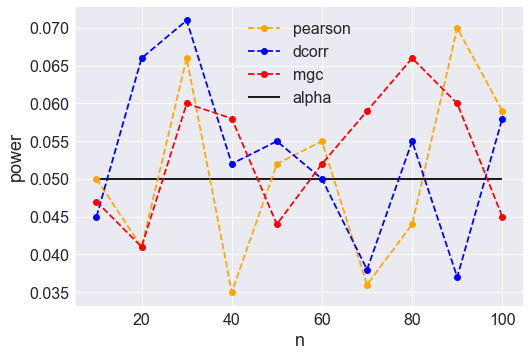

In [8]:
rho = 0
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/er_marg_power_null.png', bbox_inches='tight')

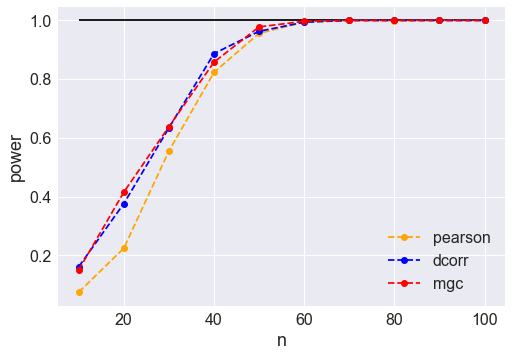

In [9]:
rho = 0.1
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/er_marg_power_alt.png'.format(rho), bbox_inches='tight')

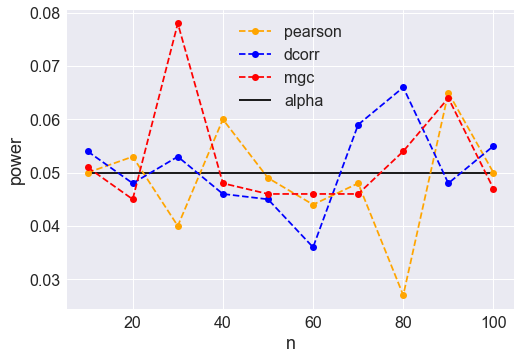

In [10]:
with open ('../../results/rho_sbm_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_power_null.png', bbox_inches='tight')

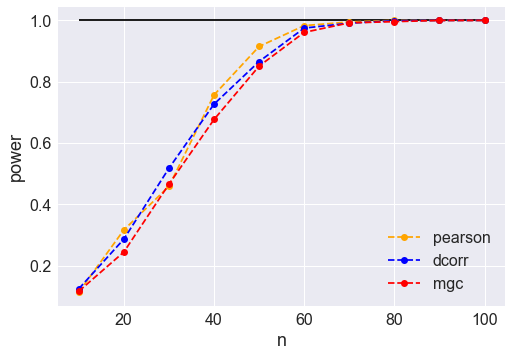

In [11]:
with open ('../../results/rho_sbm_power_alt.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_power_alt.png', bbox_inches='tight')

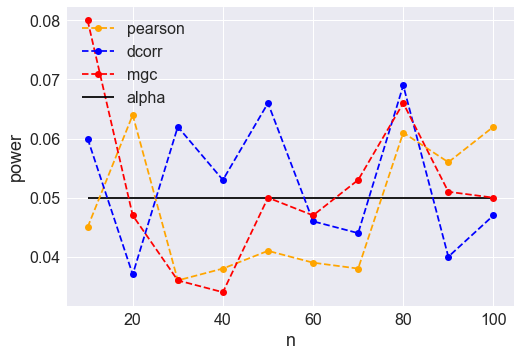

In [12]:
with open ('../../results/rho_sbm_marg_power_null.pkl', 'rb') as f:
    power_results = pickle.load(f)
    
for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_marg_power_null.png', bbox_inches='tight')

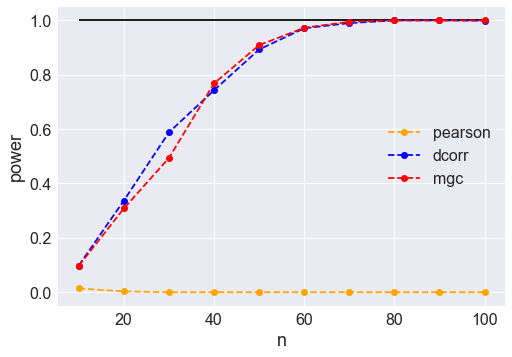

In [13]:
with open ('../../results/rho_sbm_marg_power_alt.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_marg_power_alt.png', bbox_inches='tight')

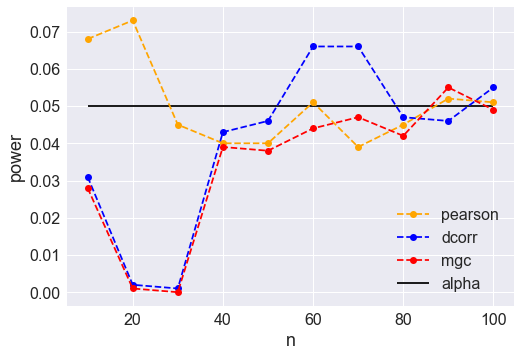

In [14]:
with open('../../results/rho_sbm_marg_est_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=4, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_marg_est_block_power_null.png', bbox_inches='tight')

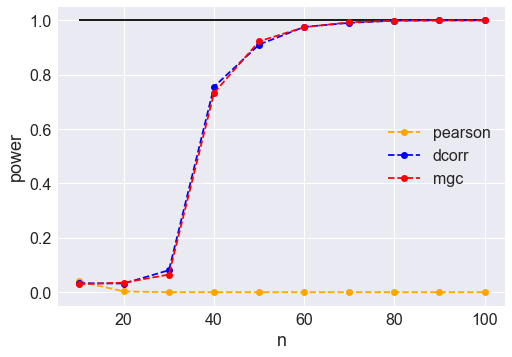

In [15]:
for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_marg_est_block_power_alt.png'.format(rho), bbox_inches='tight')

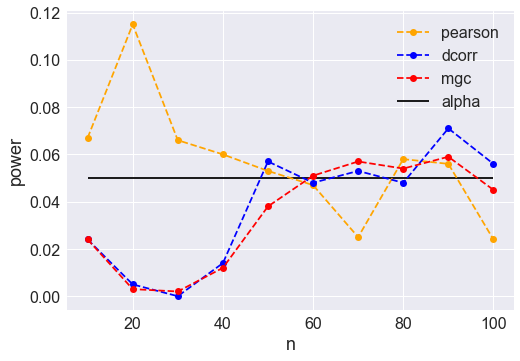

In [16]:
with open('../../results/rho_sbm_diff_block_power.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[0, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=1, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_diff_block_power_null.png', bbox_inches='tight')

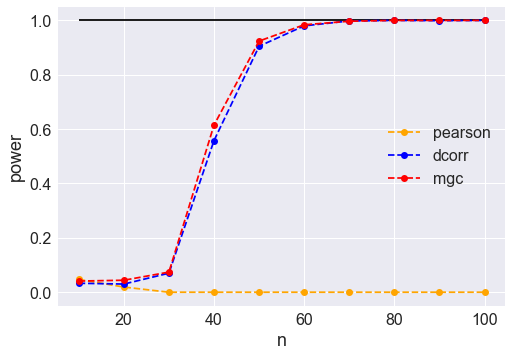

In [17]:
for name, test_power in power_results.items():
        plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=1, xmin=np.amin(n_arr), xmax=np.amax(n_arr))
plt.legend(loc=7, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)
plt.savefig('../../figures/sbm_diff_block_power_alt.png', bbox_inches='tight')

Text(0, 0.5, 'power')

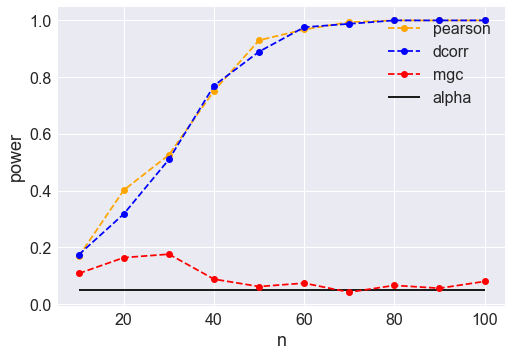

In [7]:
with open('../../results/rho_sbm_power_kernel.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=1, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)

Text(0, 0.5, 'power')

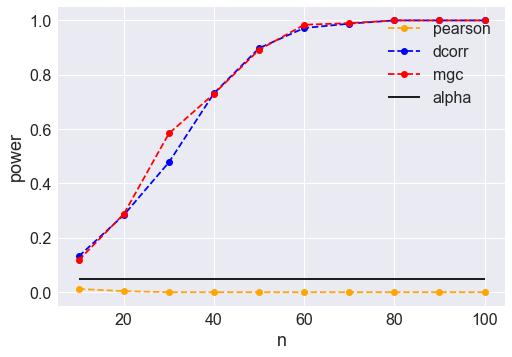

In [10]:
with open('../../results/rho_sbm_marg_power_kernel.pkl', 'rb') as f:
    power_results = pickle.load(f)

for name, test_power in power_results.items():
    plt.plot(n_arr, test_power[1, :], color=colors[name], linestyle=linestyle, 
                 marker=marker, label='{}'.format(name))

plt.hlines(y=0.05, xmin=np.amin(n_arr), xmax=np.amax(n_arr), label='alpha')
plt.legend(loc=1, prop={'size': legend_size})
plt.xlabel('n', fontsize=label_size)
plt.ylabel('power', fontsize=label_size)